# 1. 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

# 2. 데이터 이해

In [3]:
data.head(3)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3


In [4]:
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [5]:
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


# 3. 데이터 준비

#### 1) 결측치 처리
 - 시계열 데이터이므로 선형보간법으로 채운다.

In [6]:
data.interpolate(method='linear', inplace=True)

data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

#### 2) 불필요 변수 제거

In [7]:
drop_cols = ['Month', 'Day']

data.drop(columns=drop_cols, axis=1, inplace=True)

data.head(3)

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74


#### 3) x,y 분리

In [8]:
target = 'Ozone'

x = data.drop(target, axis=1)
y = data[target]

#### 4) train,test 분리

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=2022)

# 4. 모델링


In [17]:
# 1단계 : 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [18]:
# 2단계 : 선언하기
model = LinearRegression()

In [19]:
# 3단계 : 학습하기
model.fit(x_train,y_train)

LinearRegression()

In [20]:
# 4단계 : 예측하기
y_pred = model.predict(x_test)

In [27]:
print('변수(x) :', list(x))
print('기울기 :', model.coef_)
print('절편 :', model.intercept_)

변수(x) : ['Solar.R', 'Wind', 'Temp']
기울기 : [ 0.04499498 -3.64796704  1.3457936 ]
절편 : -35.74930628112196


In [22]:
# 5단계 : 평가하기
print('MAE :', mean_absolute_error(y_test,y_pred))
print('R2-score :', r2_score(y_test,y_pred))

MAE : 13.445749810271392
R2-score : 0.6645460869554878


# 5. 기타

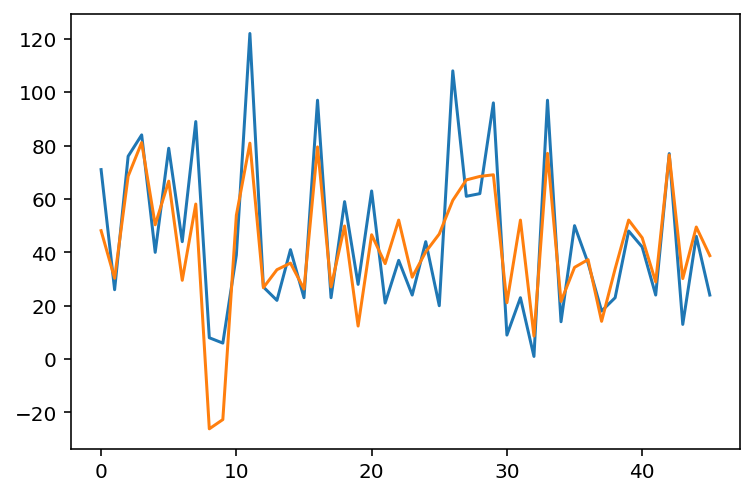

In [30]:
plt.plot(y_test.values)
plt.plot(y_pred)

plt.show()

#### 다중회귀는 직선이 3차원 이상이므로 그리기 벅차다.